<a href="https://colab.research.google.com/github/vptauffer/Ola-Mundo/blob/master/Curso_Libania_08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

          Ano       OpI       DcI       RnF       IcC
Ano  1.000000  0.992229  0.990205  0.985798 -0.934969
OpI  0.992229  1.000000  0.978685  0.977237 -0.935957
DcI  0.990205  0.978685  1.000000  0.988851 -0.937161
RnF  0.985798  0.977237  0.988851  1.000000 -0.945024
IcC -0.934969 -0.935957 -0.937161 -0.945024  1.000000


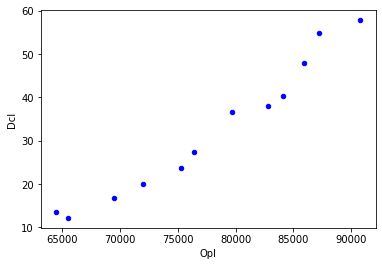

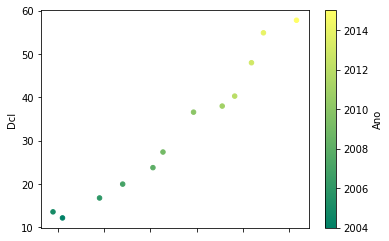

In [7]:
import pandas as pd
dados = pd.read_excel('http://profalibania.com.br/ds/secao05video04.xlsx')

# avaliando correlação entre os dados - análise bivariada: (mesmo entre números que não se relacionam - por exemplo número de refugiados e consumo de sorvete SIC)

print(dados.corr())

meuGrafico = dados.plot.scatter(x='OpI',y='DcI',c="Blue")  # scatter = gráfico de dispersão  / o argumento c pode ser cor

# mas pode ser também outra variável, por exemplo Ano, e usar um mapa de cores depois:

meuGrafico = dados.plot.scatter(x='OpI',y='DcI',c="Ano",colormap='summer')


In [9]:
# criando uma função
def minhaFuncao(meuValor):
  print('qualquer coisa - dentro da função')
print('fora da função')  

minhaFuncao(10)

fora da função
qualquer coisa - dentro da função


In [12]:
def minhaFuncao(meuValor):
  resultado = meuValor * 10
  return resultado

b = minhaFuncao(5)
print(b)

50


In [13]:
def soma(a,b):
  soma = a+b
  return soma

print(soma(2,6))

8


In [16]:
# forma resumida de criar funções
a = lambda num : num * 10   # lambda indica para o python que vocês está fazendo uma função resumida. Neste caso não precisa nomear a função
print(a(5))

b = lambda num : num + 5
print(b(5))

soma = lambda a,b : a + b
print(soma(2,7))

50
10
9


In [23]:
# trabalhando dados proporcionais
import pandas as pd
dados = pd.read_excel('http://profalibania.com.br/ds/secao05video06.xlsx')
print(dados)
# em outro dataframe os dados originais agrupados
dados2 = dados.groupby(['Reclamação de Atraso','Exame']).count() # exibe só a contagem simpes de todas as colunas do dataframe (não é bem isso que queremos)
dados2

           Data      Hora  ... Tempo de Liberação Período Solicitação
0    2025-05-01  10:05:00  ...                231               manhã
1    2025-05-01  10:26:00  ...                189               manhã
2    2025-05-01  16:08:00  ...                212               tarde
3    2025-05-01  17:47:00  ...                281               tarde
4    2025-05-01  18:45:00  ...                224               noite
...         ...       ...  ...                ...                 ...
1876 2025-05-31  13:51:00  ...                249               tarde
1877 2025-05-31  14:16:00  ...                192               tarde
1878 2025-05-31  15:11:00  ...                235               tarde
1879 2025-05-31  18:24:00  ...                223               noite
1880 2025-05-31  09:00:00  ...                202               manhã

[1881 rows x 8 columns]


Data  ...  Período Solicitação
Reclamação de Atraso Exame                     ...                     
não                  CREATININA           247  ...                  247
                     GLICEMIA             332  ...                  332
                     HEMOGRAMA COMPLETO   816  ...                  816
sim                  CREATININA            56  ...                   56
                     GLICEMIA             162  ...                  162
                     HEMOGRAMA COMPLETO   268  ...                  268

[6 rows x 6 columns]

                                         Reclamação de Atraso  Tempo de Liberação
Reclamação de Atraso Exame                                                       
não                  CREATININA                           247          236.255061
                     GLICEMIA                             332          225.292169
                     HEMOGRAMA COMPLETO                   816          215.669118
sim                  CREATININA                            56          240.303571
                     GLICEMIA                             162          221.827160
                     HEMOGRAMA COMPLETO                   268          216.940299
                                         Reclamação de Atraso
Reclamação de Atraso Exame                                   
não                  CREATININA                           247
                     GLICEMIA                             332
                     HEMOGRAMA COMPLETO                   816
sim                  CREATININA   

Reclamação de Atraso                              
Exame                          CREATININA   GLICEMIA HEMOGRAMA COMPLETO
Reclamação de Atraso                                                   
não                             81.518152  67.206478          75.276753
sim                             18.481848  32.793522          24.723247

Reclamação de Atraso                              
Exame                          CREATININA   GLICEMIA HEMOGRAMA COMPLETO
Reclamação de Atraso                                                   
não                             17.706093  23.799283          58.494624
sim                             11.522634  33.333333          55.144033

(21.732292450725623, 1.9093812555611268e-05, 2, array([[224.71291866, 366.36363636, 803.92344498],
       [ 78.28708134, 127.63636364, 280.07655502]]))


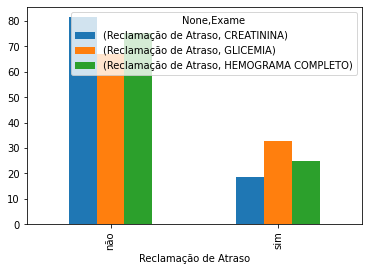

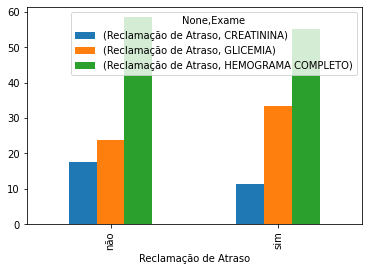

In [43]:
dados2 = dados.groupby(['Reclamação de Atraso','Exame'])
dados2tl = dados2.agg({'Reclamação de Atraso':'count', 'Tempo de Liberação':'mean'})  #função agg (agregate) - qual a coluna que vou usar e : qual o tipo de consolidação que posso fazer (contagem, média etc)
print(dados2tl)
dados2 = dados2.agg({'Reclamação de Atraso':'count'})
print(dados2)

# Em numeros absolutos sabemos qual exame teve mais reclamação
# Mas queremos saber em relação ao total de cada grupo de exames, qual teve mais reclamação:
dados3 = dados2.apply(lambda x : x/float(x.sum()) * 100)    # apply vai aplicar um valor novo dentro do dataframe
# para cada valor x, o cálculo será de x dividido pela soma do grupo (aqui ainda é não e sim tudo junto) * 100 para dar em porcentagem
print(dados3)

# mas queremos separadamente cada grupo (não e sim respectivamente)
# da maneira que está, é como se os grupamentos fossem a "tabela dinâmica" do excel
# para isso precisamos formar uma matriz (jogar o não e sim em linhas e nas colunas os tipos de exames e os cálculos) =   função desempilhar

dados2 = dados2.unstack()
dados3 = dados2.apply(lambda x : x/float(x.sum()) * 100)   
# mas assim o cálculo total por colunas ainda não é o que queremos (é a totalidade de reclamações e não totalidade de exames)
display(dados3)


dados4 = dados2.apply(lambda x : x/float(x.sum()) * 100, axis=1)  # axis 1 manda fazer os cálculos em relação às linhas
display(dados4)

dados3.plot(kind='bar')
dados4.plot(kind='bar')
#pelos gráficos é possível ver que as análises são muito diferentes em relação ao que estou analisando



In [44]:

# avaliação se há associação entre variáveis - se uma é ou não dependente da outra (qui-quadrado)
import scipy.stats as stats
print(stats.chi2_contingency(dados2))

# o segundo número (1.909381...e-05) é o valor de p, que é menor que 0,05, que mostra associação positiva entre o atraso e o tipo de exame


(21.732292450725623, 1.9093812555611268e-05, 2, array([[224.71291866, 366.36363636, 803.92344498],
       [ 78.28708134, 127.63636364, 280.07655502]]))
